In [154]:
import numpy as np
import pandas as pd
import scipy.stats as s
from matplotlib import pyplot as plt
import seaborn as sns

In [108]:
colors=['#7D110C', '#bb681c']

In [136]:
data = np.random.normal(100, 20, 97)
data = np.append(data, [500, 502, 498])

In [137]:
mean_dict = {'Arithmetic' : np.mean(data), 'Harmonic' : s.hmean(data)}

for k,v in mean_dict.items():
    print(f'{k} Mean = {v:.2f}')

difference = mean_dict['Arithmetic'] - mean_dict['Harmonic']
percentage_difference = difference / mean_dict['Arithmetic']

print(f'The difference is {difference:.2f} or {percentage_difference:.1%} of arithmetic mean.')

Arithmetic Mean = 114.11
Harmonic Mean = 101.76
The difference is 12.34 or 10.8% of arithmetic mean.


[Text(0.5, 1.0, 'Histogram of Example Data')]

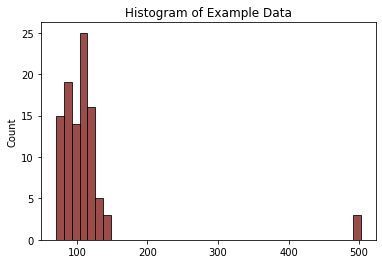

In [142]:
sns.set_palette(colors)
chart = sns.histplot(data, kde=False)
chart.set(title='Histogram of Example Data')

In [112]:
observed_std = np.std(data)

In [143]:
x = np.linspace(arithmetic_mean - 3 * observed_std, arithmetic_mean + 3 * observed_std)

y_dict = {k:s.norm.pdf(x, loc=v, scale=observed_std) for k,v in mean_dict.items()}
y_dict['x'] = x

df = pd.DataFrame(y_dict)
df = pd.melt(df, id_vars='x', var_name='Type')

[Text(0, 0.5, 'Occurance'), Text(0.5, 0, '')]

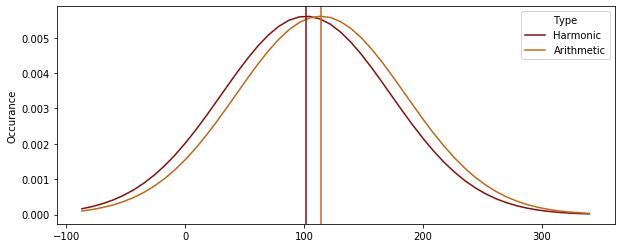

In [166]:
plt.figure(figsize=(10,4))
chart = sns.lineplot(x=df['x'], y=df['value'], hue=df['Type'], hue_order=['Harmonic', 'Arithmetic'])
chart.axvline(mean_dict['Arithmetic'], color=colors[1])
chart.axvline(mean_dict['Harmonic'], color=colors[0])
chart.set(ylabel='Occurance', xlabel='')

In [294]:
def create_return_df(returns, initial_investment=10000):
    df = pd.DataFrame(returns, columns=[2016, 2017, 2018, 2019, 2020], index=['Annualized Investment Return'])
    df.loc['Investment at Period End'] = initial_investment * ( 1 + df.iloc[0]).cumprod()
    return df

def style_return_df(df):
    df = df.style.format("{:.2%}", subset=pd.IndexSlice['Annualized Investment Return',:])\
    .format("${:,.0f}", subset=pd.IndexSlice['Investment at Period End',:])
    return df

print('The following table contains the actual investment value and investment returns per period ending.')
returns = create_return_df([[.05, .2, .25, -.1, .2]])
returns_styled = style_return_df(returns)
display(returns_styled)

geometric_mean = s.gmean(1 + returns.loc['Annualized Investment Return']) - 1
arithmetic_mean = returns.loc["Annualized Investment Return"].mean()
print('\nInvestment Return Averages\n')
print(f'The geometric mean for the investment returns is {geometric_mean:.2%}')
print(f'The arithmetic mean (which is incorrect) is {arithmetic_mean:.2%}')

print('\n\nThe following table uses the geometric average, proving it is correct.')
print('Notice that the final investment value at the end of 2020 matches the table above.')
returns_geometric = create_return_df(geometric_mean)
returns_geometric_styled = style_return_df(returns_geometric)
display(returns_geometric_styled)

print('\nThe following table uses the arithmetic average, which is proved incorrect below.')
print('Notice that the final investment value does NOT match the first table.')
returns_arithmetic = create_return_df(arithmetic_mean)
returns_arithmetic_styled = style_return_df(returns_arithmetic)

display(returns_arithmetic_styled)

The following table contains the actual investment value and investment returns per period ending.


,2016,2017,2018,2019,2020
Annualized Investment Return,5.00%,20.00%,25.00%,-10.00%,20.00%
Investment at Period End,"$10,500","$12,600","$15,750","$14,175","$17,010"



Investment Return Averages

The geometric mean for the investment returns is 11.21%
The arithmetic mean (which is incorrect) is 12.00%


The following table uses the geometric average, proving it is correct.
Notice that the final investment value at the end of 2020 matches the table above.


,2016,2017,2018,2019,2020
Annualized Investment Return,11.21%,11.21%,11.21%,11.21%,11.21%
Investment at Period End,"$11,121","$12,367","$13,754","$15,295","$17,010"



The following table uses the arithmetic average, which is proved incorrect below.
Notice that the final investment value does NOT match the first table.


,2016,2017,2018,2019,2020
Annualized Investment Return,12.00%,12.00%,12.00%,12.00%,12.00%
Investment at Period End,"$11,200","$12,544","$14,049","$15,735","$17,623"
